In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import joblib

### Data Loading and Initial Inspection

The Titanic training data (`train.csv`) and test data (`test.csv`) are loaded. The first five rows (`.head()`) and general information (`.info()`) of the datasets are displayed to get an initial understanding of data types and missing values.


In [425]:
train_data = pd.read_csv("./data/train.csv")
print("First 5 Rows of Training Data:")
train_data.head()

First 5 Rows of Training Data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [426]:
print("\nTraining Data Information:")
train_data.info()


Training Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [427]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing Value Analysis and Cleaning

Missing values in the dataset are checked and handled. Missing values in the 'Age' column are filled with the median, and those in the 'Embarked' column are filled with the most frequent value (mode). The 'Cabin' column is dropped entirely due to a high number of missing values.


In [428]:
print("Missing Values in Training Data:")
train_data.isnull().sum()

Missing Values in Training Data:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [429]:
# Fill missing values in the 'Age' column with the median
age_median = train_data['Age'].median()
train_data['Age'].fillna(age_median, inplace=True)

# Drop the 'Cabin' column
train_data.drop('Cabin', axis=1, inplace=True)

# Fill missing values in the 'Embarked' column with the mode
embarked_mode = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(embarked_mode, inplace=True)

C:\Users\nihat\AppData\Local\Temp\ipykernel_3128\2309056883.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(age_median, inplace=True)
C:\Users\nihat\AppData\Local\Temp\ipykernel_3128\2309056883.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

Let's verify if the missing values have been successfully processed:


In [430]:
print("\nAfter Filling Missing Values:")
train_data.isnull().sum()


After Filling Missing Values:


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Exploratory Data Analysis (EDA)

Survival rates are analyzed based on various categorical features to uncover important relationships.

#### Survival Rate by Sex

It is observed that female passengers have a significantly higher survival rate compared to males.

In [431]:
print("Passenger Count by Sex:")
train_data['Sex'].value_counts()

Passenger Count by Sex:


Sex
male      577
female    314
Name: count, dtype: int64

In [432]:
print("\nSurvival Rate by Sex:")
train_data.groupby('Sex')['Survived'].mean()


Survival Rate by Sex:


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

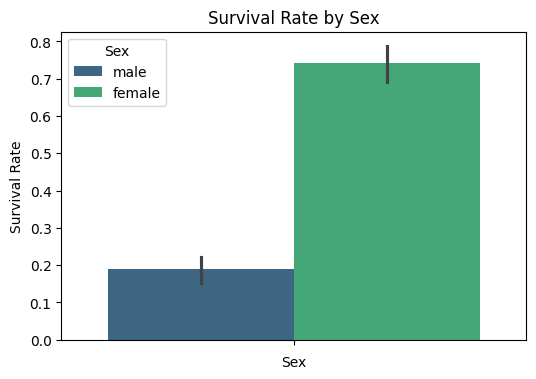

In [433]:
plt.figure(figsize=(6, 4))
sns.barplot(y="Survived", hue="Sex", data=train_data,  palette='viridis')
plt.title("Survival Rate by Sex")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.show()

#### Survival Rate by Passenger Class (Pclass)

Passengers in higher classes (Pclass 1) are seen to have a notably higher survival rate than those in lower classes (Pclass 3).


In [434]:
print("Passenger Count by Pclass:")
train_data['Pclass'].value_counts()

Passenger Count by Pclass:


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [435]:
print("\nSurvival Rate by Pclass:")
train_data.groupby('Pclass')['Survived'].mean()


Survival Rate by Pclass:


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

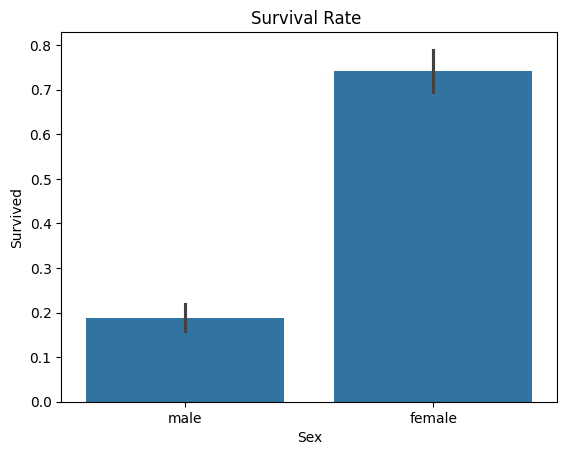

In [436]:
sns.barplot(x="Sex", y="Survived", data=train_data)
plt.title("Survival Rate ")
plt.show()

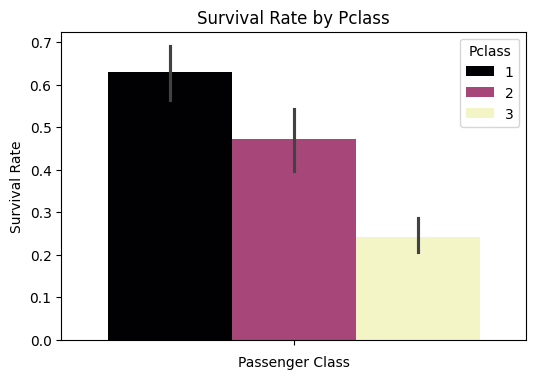

In [437]:
plt.figure(figsize=(6, 4))
sns.barplot(hue="Pclass", y="Survived", data=train_data, palette='magma')
plt.title("Survival Rate by Pclass")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

#### Impact of Age and Fare on Survival

A scatter plot is used to examine the relationship between ticket fare and age, and how this relationship affects survival. Additionally, the distribution of ticket fare is visualized with a box plot.


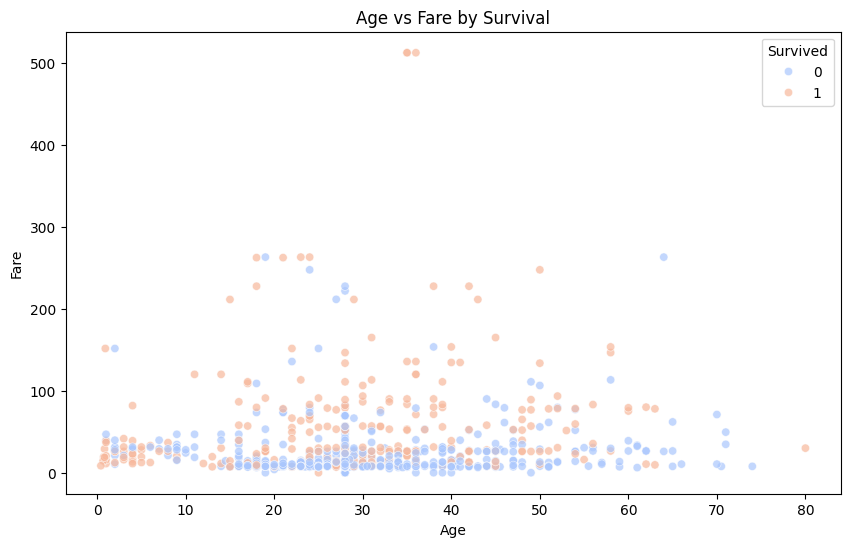

In [438]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data, palette='coolwarm', alpha=0.7)
plt.title("Age vs Fare by Survival")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

C:\Users\nihat\AppData\Local\Temp\ipykernel_3128\3273821151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', data=train_data, palette='pastel')


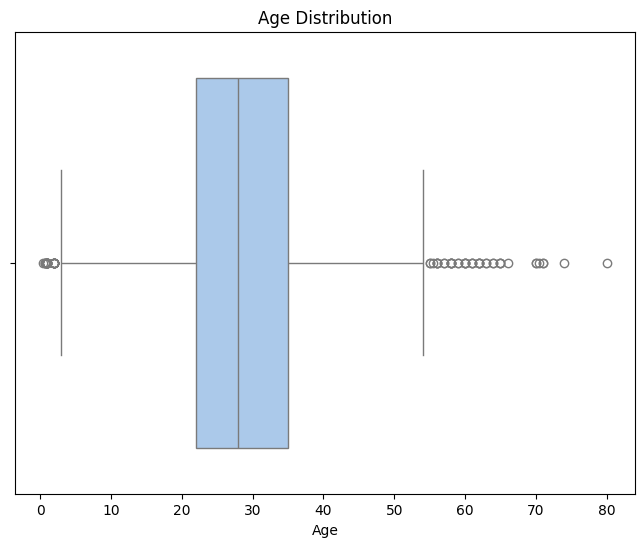

In [439]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', data=train_data, palette='pastel')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

C:\Users\nihat\AppData\Local\Temp\ipykernel_3128\1887908230.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fare', data=train_data, palette='pastel')


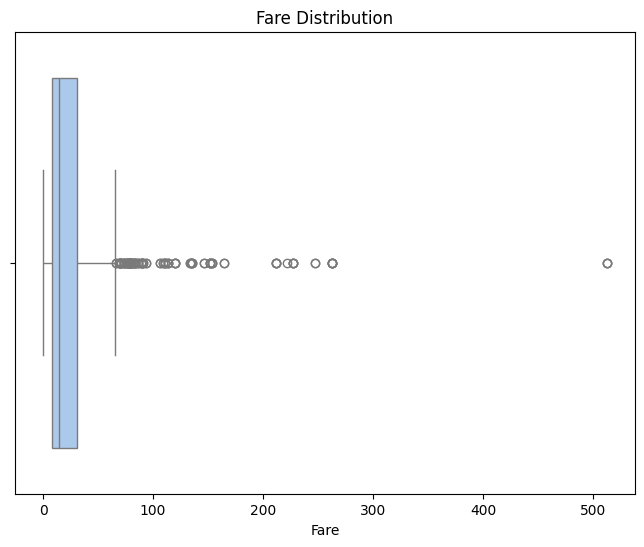

In [440]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fare', data=train_data, palette='pastel')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.show()

### Feature Engineering

New features are created and existing ones are transformed to improve model performance.

#### Fare Transformation

A logarithmic transformation is applied to the 'Fare' column to correct its skewed distribution. This can help the model learn this feature more effectively.


In [441]:
train_data['Fare'] = np.log1p(train_data['Fare'])

Examination of the fare distribution after the transformation using a box plot:

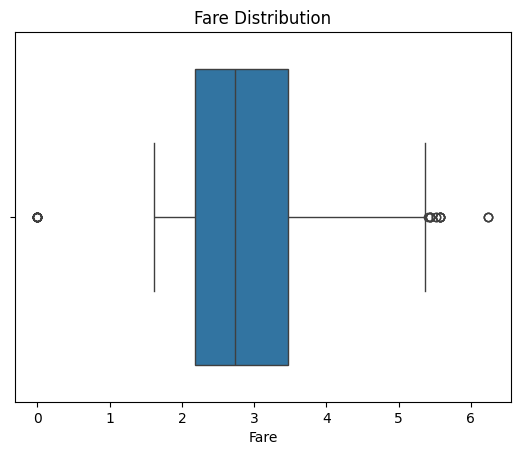

In [442]:
sns.boxplot(x="Fare", data=train_data)
plt.title("Fare Distribution")
plt.show()

Examination of the 'SibSp' distribution using a box plot:

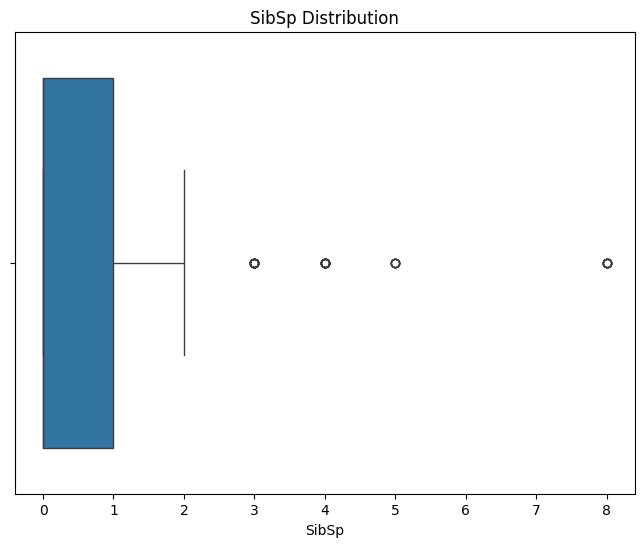

In [443]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='SibSp', data=train_data, )
plt.title("SibSp Distribution")
plt.xlabel("SibSp")
plt.show()

#### One-Hot Encoding of Categorical Variables

Categorical columns like 'Sex', 'Embarked', and 'Pclass' are converted into a numerical format that machine learning models can understand. One-Hot Encoding is applied using `pd.get_dummies`, and the first column is dropped (`drop_first=True`) to prevent multicollinearity.


In [444]:
categorical_cols = ["Sex", "Embarked", "Pclass"]
train_data = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)

#### Title Extraction and Transformation

'Title' information is extracted from passenger names, and less common titles are grouped under a 'Rare' category. This new 'Title' column is then also transformed using One-Hot Encoding.


In [445]:
# Extract title from 'Name' column
train_data['Title'] = train_data['Name'].apply(
    lambda name: re.search(r' ([A-Za-z]+)\.', name).group(1) if re.search(r' ([A-Za-z]+)\.', name) else ''
)

In [446]:
# Map rare titles
title_map = {
    "Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs",
    "Lady": "Rare", "Countess": "Rare", "Capt": "Rare", "Col": "Rare",
    "Don": "Rare", "Dr": "Rare", "Major": "Rare", "Rev": "Rare",
    "Sir": "Rare", "Jonkheer": "Rare", "Dona": "Rare" # 
}
train_data['Title'] = train_data['Title'].replace(title_map)

# Check unique values of the 'Title' column after transformation
print("Unique Values in Title Column After Transformation:")
print(train_data.Title.unique())

Unique Values in Title Column After Transformation:
['Mr' 'Mrs' 'Miss' 'Master' 'Rare']


Transforming the 'Title' column with One-Hot Encoding:

In [447]:
train_data = pd.get_dummies(train_data, columns=['Title'], drop_first=True)

#### Family Size and IsAlone

'FamilySize' is created using 'SibSp' (number of siblings/spouses) and 'Parch' (number of parents/children) columns. A new feature, `IsAlone`, is also added, indicating whether the passenger traveled alone.


In [448]:
# Family information
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)

### Dropping Unnecessary Columns

Columns not needed for model training, such as 'PassengerId', 'Name', and 'Ticket', are removed from the dataset.


In [449]:
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

The final state of the dataset 

In [450]:
train_data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,FamilySize,IsAlone
0,0,22.0,1,0,2.110213,True,False,True,False,True,False,True,False,False,2,0
1,1,38.0,1,0,4.280593,False,False,False,False,False,False,False,True,False,2,0
2,1,26.0,0,0,2.188856,False,False,True,False,True,True,False,False,False,1,1
3,1,35.0,1,0,3.990834,False,False,True,False,False,False,False,True,False,2,0
4,0,35.0,0,0,2.202765,True,False,True,False,True,False,True,False,False,1,1


### Model Training (Logistic Regression)

The dataset is split into training and test sets. Numerical features are scaled using `StandardScaler`, and a `LogisticRegression` model is trained within a `Pipeline`.


In [451]:
# Separate features (X) and target variable (y)
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']


In [452]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Model Pipeline
# StandardScaler scales numerical data, LogisticRegression trains the model
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression(random_state=42, solver='liblinear'))
])

# Train the model on the training data
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_regression',
                 LogisticRegression(random_state=42, solver='liblinear'))])

### Model Evaluation

The performance of the trained model is evaluated using `classification_report`, `roc_auc_score`, and `confusion_matrix`.

In [453]:
X= train_data.drop('Survived', axis=1)
y= train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [454]:
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),      
    ('logistic_regression', LogisticRegression(random_state=42, solver='liblinear')) 
])
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_regression',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [455]:
# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)
y_proba = model_pipeline.predict_proba(X_test)[:, 1] # Get survival probabilities

# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



#### Confusion Matrix

The confusion matrix, showing the model's correct and incorrect predictions, is visualized.

<Figure size 600x600 with 0 Axes>

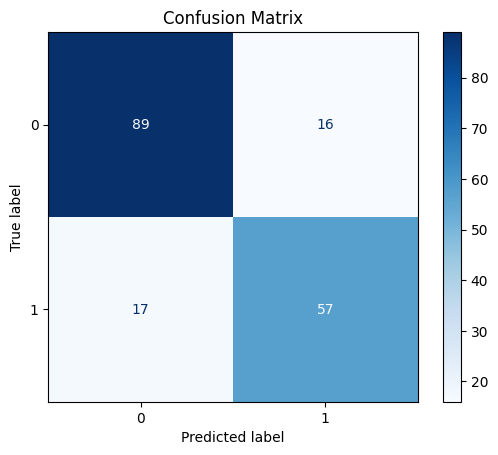

In [456]:
# Confusion Matrix
confusion_matrix_data = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_data, display_labels = [0, 1])

plt.figure(figsize=(6, 6))
cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

#### ROC Curve and AUC Score

The ROC curve is plotted, and the AUC (Area Under the Curve) score is calculated to summarize the model's classification ability. The AUC score indicates how well the model separates positive and negative classes.



ROC AUC Score: 0.89


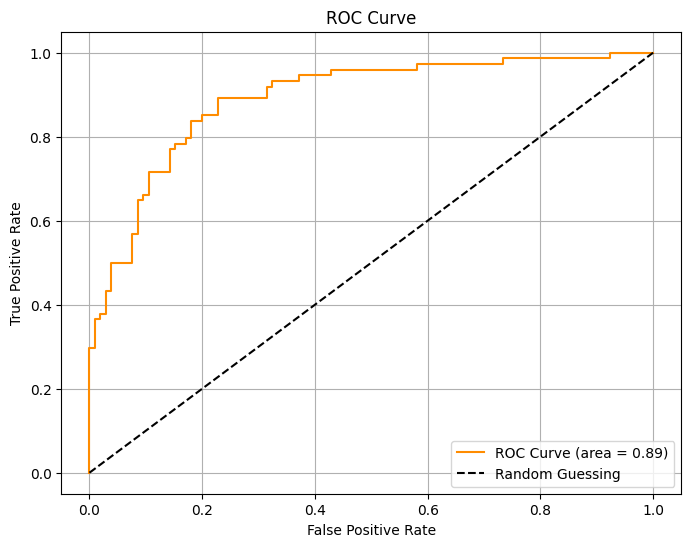

In [457]:
# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC AUC Score: {roc_auc:.2f}")

# ROC Curve (Visual)
fpr, tpr, _ = metrics.roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Model Saving 

The trained model (`model_pipeline`) is saved to a file named `model.pkl` for future use. 


In [458]:
# Save the trained pipeline as 'model.pkl'
model_filename = 'model.pkl'
joblib.dump(model_pipeline, model_filename)

print(f"\nTrained model pipeline '{model_filename}' saved.")
print("Your Streamlit application can now load this file to make predictions.")




Trained model pipeline 'model.pkl' saved.
Your Streamlit application can now load this file to make predictions.


In [459]:
print(X_train.columns.tolist())


['Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'FamilySize', 'IsAlone']
